In [20]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
output = """
Master[0]: message received from slave 6 [1][10000].
Master[0]: sending new work (task 4998) to slave 6.
Master[0]: message received from slave 1 [1][10000].
Master[0]: sending new work (task 4999) to slave 1.
Master[0]: message received from slave 3 [1][10000].

Slave[3]: kill message revceived from master. Bye bye!

 Slave[3] Sorted 710 tasks in 319.188052 seconds (mean per task 0.449561).
Master[0]: sending KILLTAG to slave 3.
Master[0]: message received from slave 4 [1][10000].

Slave[4]: kill message revceived from master. Bye bye!

 Slave[4] Sorted 719 tasks in 323.437759 seconds (mean per task 0.449844).
Master[0]: sending KILLTAG to slave 4.
Master[0]: message received from slave 5 [1][10000].

Slave[5]: kill message revceived from master. Bye bye!

 Slave[5] Sorted 710 tasks in 319.495749 seconds (mean per task 0.449994).
Master[0]: sending KILLTAG to slave 5.
Master[0]: message received from slave 2 [1][10000].

Slave[2]: kill message revceived from master. Bye bye!

 Slave[2] Sorted 720 tasks in 323.888672 seconds (mean per task 0.449845).
Master[0]: sending KILLTAG to slave 2.
Master[0]: message received from slave 7 [1][10000].

Slave[7]: kill message revceived from master. Bye bye!

 Slave[7] Sorted 710 tasks in 319.941290 seconds (mean per task 0.450622).
Master[0]: sending KILLTAG to slave 7.
Master[0]: message received from slave 1 [1][10000].

Slave[1]: kill message revceived from master. Bye bye!

 Slave[1] Sorted 711 tasks in 320.036166 seconds (mean per task 0.450121).
Master[0]: sending KILLTAG to slave 1.
Master[0]: message received from slave 6 [1][10000].
Master[0]: sending KILLTAG to slave 6.

Execution time in seconds: 324.106950


Slave[6]: kill message revceived from master. Bye bye!

 Slave[6] Sorted 720 tasks in 323.983113 seconds (mean per task 0.449977).
fppd10@grad05:~$
"""

In [15]:
# Divide a saída em linhas
lines = output.split('\n')

# Cria uma lista para armazenar os dados
data = []

# Para cada linha, verifica se começa com "Slave" e contém "Sorted"
for line in lines:
    if line.strip().startswith("Slave") and "Sorted" in line:
        # Extrai os números da linha
        numbers = re.findall(r"[-+]?\d*\.\d+|\d+", line)
        # Converte os números para float e adiciona à lista de dados
        data.append([float(num) for num in numbers])

# Cria um DataFrame a partir dos dados
df = pd.DataFrame(data, columns=['Slave', 'Tasks', 'Time', 'Mean'])

df


,Slave,Tasks,Time,Mean
0,3.0,710.0,319.188052,0.449561
1,4.0,719.0,323.437759,0.449844
2,5.0,710.0,319.495749,0.449994
3,2.0,720.0,323.888672,0.449845
4,7.0,710.0,319.941290,0.450622
5,1.0,711.0,320.036166,0.450121
6,6.0,720.0,323.983113,0.449977


In [9]:
df

,Slave,Tasks,Time,Mean
0,3.0,719.0,185.004648,0.257308
1,7.0,717.0,185.006419,0.258028
2,1.0,713.0,185.017277,0.259491
3,4.0,713.0,185.029718,0.259509
4,2.0,718.0,185.078076,0.257769
5,6.0,710.0,185.207306,0.260855
6,5.0,710.0,185.246744,0.260911


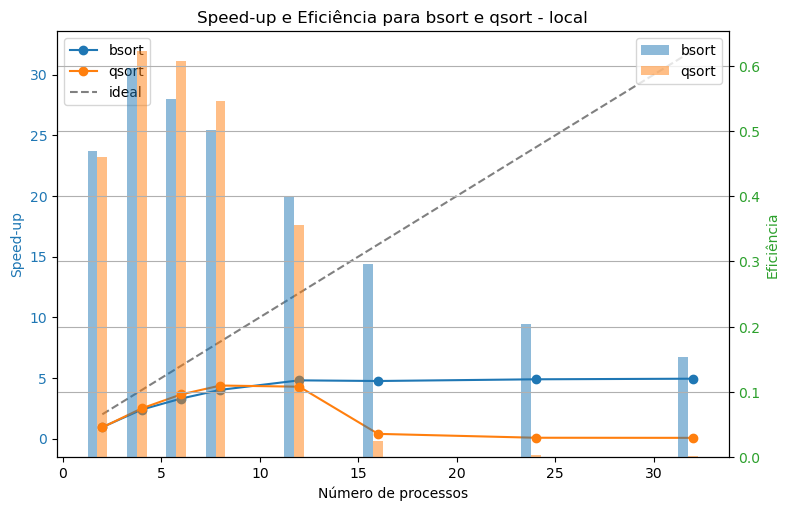

In [24]:

# Tempo de execução sequencial
bsort_seq = 744.5578
qsort_seq = 10.6989

# Número de processos
processes = [2, 4, 6, 8, 12, 16, 24, 32]

# Tempo de execução paralela
bsort_par = [791.931651,311.615506,225.759620,185.305187,155.141301,156.882070,152.376969,150.859998]
qsort_par = [11.607579,4.298921,2.939499,2.446454,2.502366,27.565379,156.615179,178.460089]

# Cálculo do speed-up
bsort_speedup = [bsort_seq / t for t in bsort_par]
qsort_speedup = [qsort_seq / t for t in qsort_par]

# Cálculo da eficiência
bsort_efficiency = [s / p for s, p in zip(bsort_speedup, processes)]
qsort_efficiency = [s / p for s, p in zip(qsort_speedup, processes)]

# Speed-up ideal
ideal_speedup = processes

# Plotagem do gráfico de speed-up e eficiência
fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:blue'
ax1.set_xlabel('Número de processos')
ax1.set_ylabel('Speed-up', color=color)
ax1.plot(processes, bsort_speedup, marker='o', color=color, label='bsort')
ax1.plot(processes, qsort_speedup, marker='o', color='tab:orange', label='qsort')
ax1.plot(processes, ideal_speedup, linestyle='--', color='gray', label='ideal')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Eficiência', color=color)
ax2.bar(np.array(processes) - 0.5, bsort_efficiency, width=0.5, color='tab:blue', alpha=0.5, label='bsort')
ax2.bar(np.array(processes), qsort_efficiency, width=0.5, color='tab:orange', alpha=0.5, label='qsort')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Speed-up e Eficiência para bsort e qsort - local')
plt.grid(True)
plt.show()


In [18]:
bsort_speedup

[0.9988155539269825,
 2.9999715924444383,
 4.981720764003218,
 6.914825800557501,
 10.331955363159977,
 14.091719794643746,
 14.936017944789603,
 15.056775636744547]